# Přehled funkcí

Scipy je knihovna poskytující monožství základních algoritmů pro numerické výpočty a zpracování dat. Je úzce navázána na NumPy. Většina algoritmů jsou standardní implementace v C a Fortranu přičemž SciPy k nim poskytuje jednotné a elegantní Pythoní rozhraní.

Přehled funkcí s odkazy do dokumentace:

- [**Speciální matematické funkce**](https://docs.scipy.org/doc/scipy/reference/tutorial/special.html) 
  [`scipy.special`](https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special) Beselovy funkce, eliptické funkce, jejich derivace a další 

- **Numerická integrace řešení ODE**
  [`scipy.integrate`](https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate), 
      - adaptivní numerická integrace funkcí v 1D, 2D, 3D. Ve 2D a 3D jsou hranice oblastí dané funkcemi.  
      - integrace diferenciálních rovnic: počáteční úlohy `solve_ivp`, okrajové úlohy `solve_bvp`

- [**Optimalizace a nelineární rovnice**](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)
  [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize)
  Gradientní (lokální) metody pro nevázané a vázané minimalizační problémy, 'globální' optimalizace, řešení soustav nelineární algebraických rovnic
  
- [**Interpolace**](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)
  [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate)
  Interpolace polynomi a spline funkcemi v 1D (a 2D).

- [**Fourierova transformace**](https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html)
  [`scipy.fftpack`](https://docs.scipy.org/doc/scipy/reference/fftpack.html#module-scipy.fftpack)
  Diskrétní fuourierova transformace a její varianty, diskrétní konvoluce.
  
- [**Zpracování signálu**](https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html)
  [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal)
  Filtry, konvoluce, spektrum, ...
  
- [**Lineární algebra**](https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html)
  [`scipy.linalg`](https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg)
  Funkce z `numpy.linalg` plus podpora pokročilejších algoritmů. 

    - [**Vlastní čísla pro řídké matice (ARPACK)**](https://docs.scipy.org/doc/scipy/reference/tutorial/arpack.html)  
      [`scipy.sparse.linalg.eigs`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigs.html#scipy.sparse.linalg.eigsscipy.)

- [**Práce s prostorovými daty**](https://docs.scipy.org/doc/scipy/reference/tutorial/spatial.html)
  [`scipy.spatial`](https://docs.scipy.org/doc/scipy/reference/spatial.html#module-scipy.spatial)
  Triangulace, Voronoi diagramy, konvexní obaly
  
- [**Statistika a pravděpodobnost**](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
  [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)
  Distribuční funkce, hustoty a generátory pro různá rozdělení. Vybraný vektorové náhodné veličiny. Odhady parametrů,
  testování hypotéz, ...
  
- [**Zpracování obrazu**](https://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html)
  [`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage)

  

## Řešení rovnic


### Newton method convergence regions - fractal

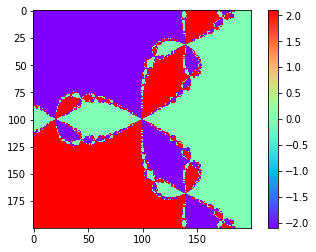

In [56]:
import matplotlib.pyplot as plt
import numpy as np

degree = 3
def newton(xy):
    z = complex(*xy)
    for i in range(255):
        fn = z ** degree - complex(1)
        fn_prime = degree * (z ** (degree - 1))
        z, z0 = z  - fn/fn_prime, z
    return np.angle(z) #np.round(degree * /2/np.pi)

side = np.linspace(-1,1, 200)
X, Y = np.meshgrid(side, side)
xy = np.stack((X,Y), axis=2)
Z = np.zeros_like(X)
Z = np.apply_along_axis(newton, 2, xy)
#print(Z)    
    
plt.imshow(Z, cmap='rainbow')
plt.colorbar()
plt.show()

### Domains of convergence for other root fiding methods

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: OptimizeWarning: Unknown solver options: maxiter


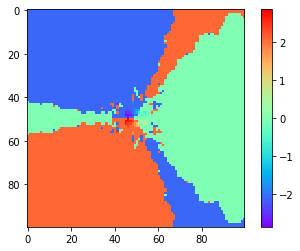

In [64]:
# Solving equation `z^n == 1` in complex numbers, using Newton's method
import scipy.optimize as opt

degree = 3


def fun(x):
    # f(z) = z^degree - 1
    re, im = x
    z = complex(re, im)
    fz = z**degree - 1
    return [fz.real, fz.imag ]

def fprime(x):
    # f'(z) complex function derivative -> Jacobian matrix
    re, im = x
    z = complex(re, im)
    dfdz = degree*z**(degree - 1)
    return [[ dfdz.real, dfdz.imag], [-dfdz.imag, dfdz.real ]]
    
def get_root(z0_ar):
    # There are 'degree' roots. Return index of the clossest root to the result.
    res = opt.root(fun, z0_ar, method='hybr', options = dict(maxiter=20))
    # More regular domains for the standard solver: Powell hybrid method from MINPACK
    #res = opt.root(fun, z0_ar, method='lm', options = dict(maxiter=20))
    # Still fractal for Levenberg-Marquardt
    re, im = res.x
    
    #re, im = opt.fsolve(fun, z0_ar, fprime=fprime)
    #re, im = opt.fsolve(fun, z0_ar, maxfev=20)
    return np.angle(complex(re, im))

import matplotlib.pyplot as plt
import numpy as np

side = np.linspace(-2,2, 100)
X, Y = np.meshgrid(side, side)
xy = np.stack((X,Y), axis=2)
Z = np.zeros_like(X)
Z = np.apply_along_axis(get_root, 2, xy)
#print(Z)    
    
plt.imshow(Z, cmap='rainbow', interpolation='nearest')
plt.colorbar()
plt.show()


## Optimization, non-linear least squares

In [29]:
# Parametric non-linear model
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

# Artificial data with noise.
xdata = np.linspace(0, 5, 50)
beta = (0.25, 0.75, 0.5)
print("Exact parameters: ", beta)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

# Misfit function
def g(beta):
    return ydata - f(xdata, *beta)

beta_start = (1, 1, 1)
beta_opt, beta_cov = opt.leastsq(g, beta_start)
print("Least sqr. parameters: ", beta_opt)


Exact parameters:  (0.25, 0.75, 0.5)
Least sqr. parameters:  [0.2434987  0.76397109 0.45450789]


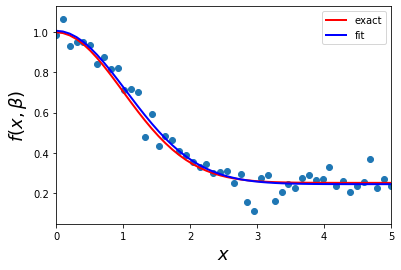

In [65]:
fig, ax = plt.subplots()
# Plot data
ax.scatter(xdata, ydata)
# Plot exact func
ax.plot(xdata, y, 'r', lw=2, label='exact')
# Plot fit
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='fit')
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()
plt.show()


## Polynom from roots

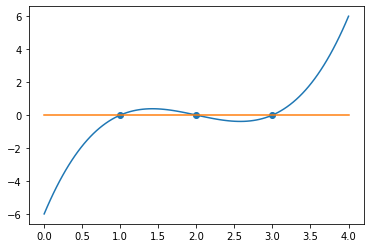

In [76]:
import numpy.polynomial as poly

roots = [1,2,3]
p = poly.Polynomial.fromroots(roots)
x=np.linspace(0,4,100)
plt.plot(x, p(x))
plt.plot(x, np.zeros_like(x))
plt.scatter(roots, np.zeros_like(roots))

### Čebyševovy polynomy - interpolace

<module 'numpy.polynomial' from '/home/jb/.local/lib/python3.6/site-packages/numpy/polynomial/__init__.py'>


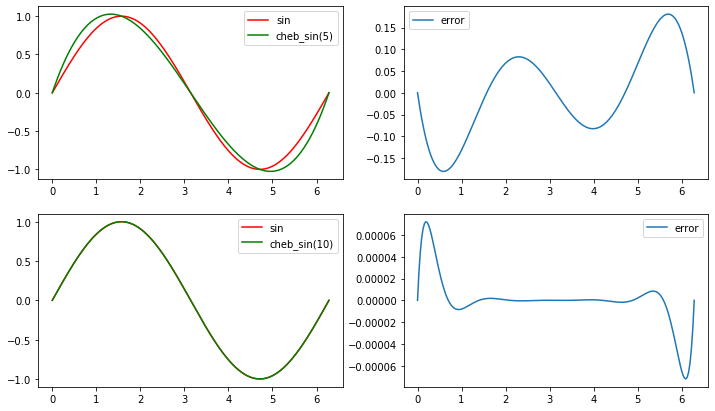

In [80]:
import numpy.linalg as la
from scipy.interpolate import lagrange

print(P)
def cheb_sin(deg):
    x_sample = np.linspace(0, 2*np.pi, deg)
    y_sample = np.sin(x_sample)
    A = poly.chebyshev.chebvander(x_sample, len(x_sample)-1)
    c = la.solve(A, y_sample)
    return poly.Chebyshev(c)
    
def lag_sin(deg):
    X = np.linspace(0, 2*np.pi, deg)
    Y = np.sin(X)
    return lagrange(X, Y)

fig,ax  = plt.subplots(2, 2, figsize=(12, 7))

for i_row, degree in enumerate([5,10]):
    i_func = lag_sin(degree)    
    x=np.linspace(0, 2*np.pi, 200)
    ax_sin, ax_err = ax[i_row]
    ax_sin.plot(x, np.sin(x), c='r', label='sin')
    ax_sin.plot(x, i_func(x), c='g', label='cheb_sin({})'.format(degree))
    ax_sin.legend()
    ax_err.plot(x, np.sin(x) - i_func(x), label='error')
    ax_err.legend()
plt.show()


## Spline interpolation

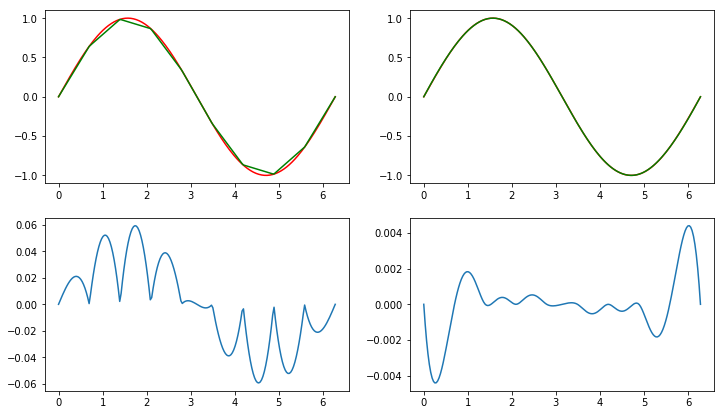

In [7]:
import scipy.interpolate as interpolate

def spline_sin(N, deg):
    x_sample = np.linspace(0, 2*np.pi, N)
    y_sample = np.sin(x_sample)
    return interpolate.interp1d(x_sample, y_sample, kind=deg)
    
fig,ax  = plt.subplots(2, 2, figsize=(12, 7))
    
i_func = spline_sin(10,1)    
x=np.linspace(0, 2*np.pi, 200)
ax[0][0].plot(x, np.sin(x), c='r')
ax[0][0].plot(x, i_func(x), c='g')
ax[1][0].plot(x, np.sin(x) - i_func(x))

i_func = spline_sin(10,3)
ax[0][1].plot(x, np.sin(x), c='r')
ax[0][1].plot(x, i_func(x), c='g')
ax[1][1].plot(x, np.sin(x) - i_func(x))
plt.show()

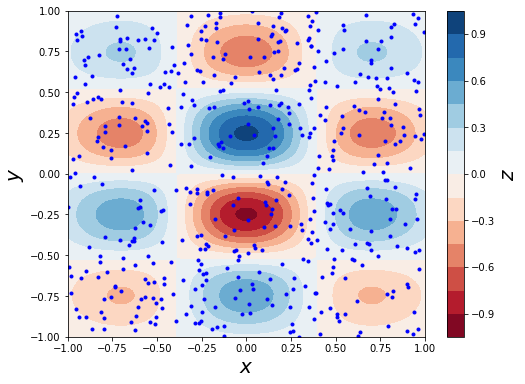

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Test bivariate function
def f(x, y):
    return np.exp(-x**2 - y**2) * np.cos(4*x) * np.sin(6*y)

# random 2d sample points
N = 500
xdata = np.random.uniform(-1, 1, N)
ydata = np.random.uniform(-1, 1, N)
# samples
zdata = f(xdata, ydata)

# Plot function and sample points
x = y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.contourf(X, Y, Z, 15, cmap=plt.cm.RdBu);
ax.scatter(xdata, ydata, marker='.', c='b')
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
cb = fig.colorbar(c, ax=ax)
cb.set_label(r"$z$", fontsize=20)
plt.show()

(100, 100) (100, 100) (100, 100)
(100, 100) (100, 100) (100, 100)
(100, 100) (100, 100) (100, 100)


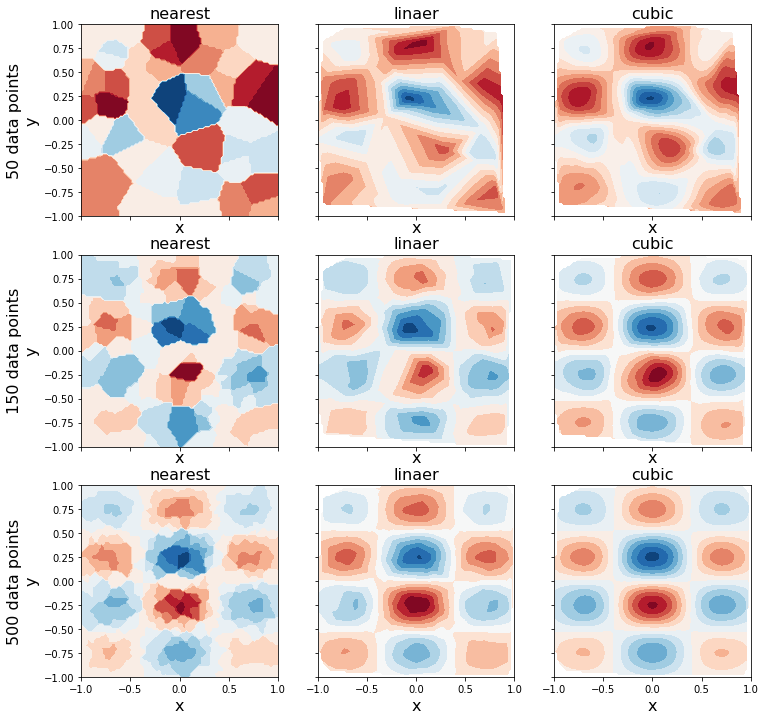

In [9]:
x = y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

def z_interpolate(xdata, ydata, zdata):
    """
    Interpolate unstructured samples to super sampled structured grid
    """
    Zi_0 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='nearest')
    Zi_1 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='linear')
    Zi_3 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='cubic')
    return Zi_0, Zi_1, Zi_3

# Plot resulting interpolant for increasing number of smaple points.
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)
n_vec = [50, 150, 500]

for idx, n in enumerate(n_vec):
    Zi_0, Zi_1, Zi_3 = z_interpolate(xdata[:n], ydata[:n], zdata[:n])
    print(X.shape, Y.shape, Zi_0.shape)
    axes[idx, 0].contourf(X, Y, Zi_0, 15, cmap=plt.cm.RdBu)
    axes[idx, 0].set_ylabel("%d data points\ny" % n, fontsize=16)
    axes[idx, 0].set_title("nearest", fontsize=16)
    axes[idx, 1].contourf(X, Y, Zi_1, 15, cmap=plt.cm.RdBu)
    axes[idx, 1].set_title("linear", fontsize=16)
    axes[idx, 2].contourf(X, Y, Zi_3, 15, cmap=plt.cm.RdBu)
    axes[idx, 2].set_title("cubic", fontsize=16)

    for m in range(len(n_vec)):
        axes[idx, m].set_xlabel("x", fontsize=16)
    
plt.show()    


(50, 50) (50, 50) (50, 50)


/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1533: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


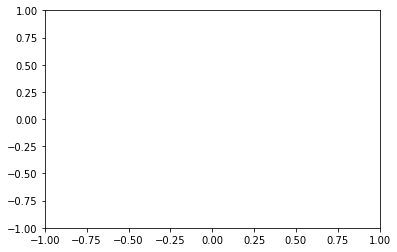

In [10]:
# Under sampling (WIP)
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt

# Test bivariate function
def f(x, y):
    return np.exp(-x**2 - y**2) * np.cos(4*x) * np.sin(6*y)

# Many samples
N = 500
xdata = np.random.uniform(-1, 1, N)
ydata = np.random.uniform(-1, 1, N)
zdata = f(xdata, ydata)

# sparse regular grid
x = y = np.linspace(-1, 1, 5)
X, Y = np.meshgrid(x, y)
# Interpolate from unstructured to sparse structured grid
z_regular = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='cubic')
# Construct interpolant on structured grid
f_interp = interpolate.interp2d(x, y, z_regular, kind='cubic')

# Evaluate interpolant, error from function and error from samples
# on plotting grid.
x = y = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(x, y)
Xr = X.flatten()
Yr = Y.flatten()
Z_func = f(Xr,Yr)

Zi = f_interp(x, y)
Z_err_f = Z_func.reshape(len(x), len(x)) - Zi
#Z_err_sample = zdata - f_interp(xdata, ydata)

print(X.shape, Y.shape, Zi.shape)
# Plots
#fig, axes = plt.subplots(1, 3, figsize=(12, 12), sharex=True, sharey=True)
plt.contourf(X, Y, Zi, 15, cmap=plt.cm.RdBu)
#axes[0, 0].set_title("Interpolant", fontsize=16)
#axes[0, 1].imshow(Zerr_f, cmap=plt.cm.RdBu, interpolation='linear')
#axes[0, 1].set_title("Interpolant - function error", fontsize=16)
#axes[0, 1].scatter(xdata, ydata, c=Z_err_sample, cmap=plt.cm.RdBu)
#axes[0, 1].set_title("Interpolant - samples error", fontsize=16)
    
plt.show()    



## Numerická kvadratura

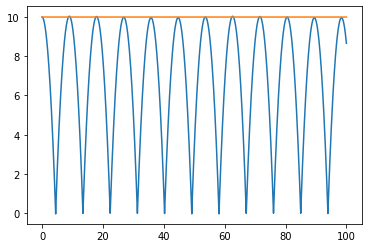

1.4901161193847657e-12 10.0 -1.4901161193847657e-12
1.490265130996704e-08 10.0 -1.490265130996704e-08
1.639142632484436e-07 9.999999999999988 -1.639142632484436e-07
1.6540303826332093e-06 9.999999999998632 -1.6540303826332093e-06
1.6555191576480865e-05 9.999999999862963 -1.6555191576480865e-05
0.00016556680351495742 9.999999986293817 -0.00016556680351495742
0.0016556829228997231 9.99999862935703 -0.0016556829228997231
0.011655682922899722 9.999932072527802 -0.011655682922899722
0.021655682922899724 9.999765515698574 -0.021655682922899724
0.031655682922899726 9.999498958869344 -0.031655682922899726
0.04165568292289973 9.999132402040114 -0.04165568292289973
0.05165568292289973 9.998665845210885 -0.05165568292289973
0.06165568292289973 9.998099288381656 -0.06165568292289973
0.07165568292289973 9.997432731552427 -0.07165568292289973
0.08165568292289972 9.996666174723199 -0.08165568292289972
0.09165568292289972 9.99579961789397 -0.09165568292289972
0.10165568292289971 9.99483306106474 -0.10

12.307910101493464 4.413804734703838 -3.3545987356478535
12.317910101493464 4.38020874734736 -3.3645987356478533
12.327910101493464 4.3465127599908815 -3.374598735647853
12.337910101493463 4.312716772634403 -3.384598735647853
12.347910101493463 4.278820785277924 -3.3945987356478526
12.357910101493463 4.244824797921446 -3.4045987356478524
12.367910101493463 4.210728810564968 -3.414598735647852
12.377910101493462 4.176532823208489 -3.424598735647852
12.387910101493462 4.14223683585201 -3.434598735647852
12.397910101493462 4.107840848495532 -3.4445987356478516
12.407910101493462 4.073344861139054 -3.4545987356478514
12.417910101493462 4.038748873782575 -3.464598735647851
12.427910101493461 4.004052886426097 -3.474598735647851
12.437910101493461 3.969256899069618 -3.4845987356478507
12.447910101493461 3.9343609117131395 -3.4945987356478505
12.45791010149346 3.899364924356661 -3.5045987356478503
12.46791010149346 3.8642689370001824 -3.51459873564785
12.47791010149346 3.8290729496437037 -3.5

24.65366840986723 7.556092378678243 2.207203214615223
24.66366840986723 7.578114410824395 2.1972032146152234
24.673668409867233 7.600036442970548 2.1872032146152236
24.683668409867234 7.6218584751167 2.177203214615224
24.693668409867236 7.643580507262852 2.167203214615224
24.703668409867237 7.665202539409004 2.1572032146152242
24.71366840986724 7.686724571555157 2.1472032146152245
24.72366840986724 7.7081466037013096 2.1372032146152247
24.733668409867242 7.729468635847462 2.127203214615225
24.743668409867244 7.750690667993614 2.117203214615225
24.753668409867245 7.771812700139766 2.1072032146152253
24.763668409867247 7.792834732285918 2.0972032146152255
24.77366840986725 7.81375676443207 2.0872032146152257
24.78366840986725 7.8345787965782225 2.077203214615226
24.79366840986725 7.855300828724375 2.067203214615226
24.803668409867253 7.875922860870527 2.0572032146152264
24.813668409867255 7.896444893016679 2.0472032146152266
24.823668409867256 7.916866925162831 2.037203214615227
24.83366

36.6868781203768 9.572850125125898 -0.8904129251245793
36.696878120376795 9.563895995874653 -0.9004129251245793
36.70687812037679 9.554841866623407 -0.9104129251245793
36.71687812037679 9.545687737372162 -0.9204129251245793
36.72687812037679 9.536433608120916 -0.9304129251245793
36.73687812037679 9.52707947886967 -0.9404129251245793
36.746878120376785 9.517625349618424 -0.9504129251245793
36.75687812037678 9.508071220367178 -0.9604129251245793
36.76687812037678 9.498417091115932 -0.9704129251245793
36.77687812037678 9.488662961864687 -0.9804129251245793
36.78687812037678 9.478808832613442 -0.9904129251245793
36.796878120376775 9.468854703362195 -1.0004129251245792
36.80687812037677 9.458800574110949 -1.0104129251245793
36.81687812037677 9.448646444859703 -1.0204129251245793
36.82687812037677 9.438392315608457 -1.0304129251245793
36.83687812037677 9.428038186357211 -1.0404129251245793
36.846878120376765 9.417584057105966 -1.0504129251245793
36.85687812037676 9.40702992785472 -1.06041292

46.461493687500614 8.466940460083167 -1.7342026420011791
46.47149368750061 8.449548433663155 -1.7442026420011791
46.48149368750061 8.432056407243143 -1.7542026420011791
46.49149368750061 8.414464380823132 -1.7642026420011792
46.501493687500606 8.39677235440312 -1.7742026420011792
46.511493687500604 8.37898032798311 -1.7842026420011792
46.5214936875006 8.361088301563097 -1.7942026420011792
46.5314936875006 8.343096275143084 -1.8042026420011792
46.5414936875006 8.325004248723072 -1.8142026420011792
46.551493687500596 8.30681222230306 -1.8242026420011792
46.561493687500594 8.288520195883049 -1.8342026420011792
46.57149368750059 8.270128169463037 -1.8442026420011792
46.58149368750059 8.251636143043026 -1.8542026420011792
46.59149368750059 8.233044116623015 -1.8642026420011792
46.601493687500586 8.214352090203002 -1.8742026420011793
46.611493687500584 8.19556006378299 -1.8842026420011793
46.62149368750058 8.176668037362978 -1.8942026420011793
46.63149368750058 8.157676010942966 -1.904202642

57.18744722974523 3.801762664457636 -3.5217509002455487
57.19744722974523 3.7664951554551807 -3.5317509002455485
57.20744722974523 3.731127646452725 -3.5417509002455483
57.217447229745225 3.6956601374502696 -3.551750900245548
57.22744722974522 3.660092628447814 -3.561750900245548
57.23744722974522 3.6244251194453585 -3.5717509002455476
57.24744722974522 3.588657610442903 -3.5817509002455474
57.25744722974522 3.5527901014404475 -3.591750900245547
57.267447229745216 3.516822592437992 -3.601750900245547
57.27744722974521 3.4807550834355365 -3.611750900245547
57.28744722974521 3.444587574433081 -3.6217509002455466
57.29744722974521 3.4083200654306256 -3.6317509002455464
57.30744722974521 3.37195255642817 -3.641750900245546
57.317447229745206 3.3354850474257147 -3.651750900245546
57.327447229745204 3.298917538423259 -3.6617509002455457
57.3374472297452 3.262250029420804 -3.6717509002455455
57.3474472297452 3.2254825204183484 -3.6817509002455453
57.3574472297452 3.188615011415893 -3.69175090

68.91739634212433 6.487104228565279 2.660410482706877
68.92739634212434 6.513658333392348 2.650410482706877
68.93739634212434 6.540112438219417 2.6404104827068773
68.94739634212435 6.566466543046485 2.6304104827068775
68.95739634212435 6.592720647873554 2.6204104827068777
68.96739634212436 6.618874752700623 2.610410482706878
68.97739634212436 6.644928857527692 2.600410482706878
68.98739634212437 6.67088296235476 2.5904104827068783
68.99739634212438 6.696737067181829 2.5804104827068786
69.00739634212438 6.722491172008898 2.5704104827068788
69.01739634212439 6.748145276835967 2.560410482706879
69.02739634212439 6.773699381663035 2.550410482706879
69.0373963421244 6.799153486490104 2.5404104827068794
69.0473963421244 6.824507591317173 2.5304104827068796
69.0573963421244 6.849761696144242 2.52041048270688
69.06739634212441 6.87491580097131 2.51041048270688
69.07739634212442 6.899969905798379 2.5004104827068803
69.08739634212442 6.924924010625448 2.4904104827068805
69.09739634212443 6.94977

81.94003622763778 8.997624474692746 -1.4130503682136828
81.95003622763778 8.983443971010608 -1.4230503682136828
81.96003622763779 8.969163467328471 -1.4330503682136828
81.97003622763779 8.954782963646334 -1.4430503682136828
81.9800362276378 8.940302459964197 -1.4530503682136828
81.9900362276378 8.92572195628206 -1.4630503682136828
82.0000362276378 8.911041452599925 -1.4730503682136828
82.01003622763781 8.896260948917789 -1.4830503682136829
82.02003622763782 8.881380445235651 -1.4930503682136829
82.03003622763782 8.866399941553514 -1.5030503682136829
82.04003622763783 8.851319437871377 -1.5130503682136829
82.05003622763783 8.83613893418924 -1.523050368213683
82.06003622763784 8.820858430507103 -1.533050368213683
82.07003622763784 8.805477926824967 -1.543050368213683
82.08003622763785 8.78999742314283 -1.553050368213683
82.09003622763785 8.774416919460693 -1.563050368213683
82.10003622763786 8.758736415778555 -1.573050368213683
82.11003622763786 8.742955912096418 -1.583050368213683
82.12

95.1372816859078 4.6679121791195355 3.2552376083060954
95.1472816859078 4.700414555202596 3.2452376083060956
95.1572816859078 4.732816931285657 3.235237608306096
95.16728168590781 4.765119307368718 3.225237608306096
95.17728168590781 4.797321683451779 3.2152376083060963
95.18728168590782 4.82942405953484 3.2052376083060965
95.19728168590783 4.861426435617901 3.1952376083060967
95.20728168590783 4.893328811700962 3.185237608306097
95.21728168590784 4.9251311877840225 3.175237608306097
95.22728168590784 4.956833563867083 3.1652376083060973
95.23728168590785 4.988435939950144 3.1552376083060976
95.24728168590785 5.019938316033206 3.1452376083060978
95.25728168590786 5.051340692116266 3.135237608306098
95.26728168590786 5.082643068199327 3.125237608306098
95.27728168590787 5.113845444282388 3.1152376083060984
95.28728168590787 5.1449478203654495 3.1052376083060986
95.29728168590788 5.17595019644851 3.095237608306099
95.30728168590788 5.206852572531571 3.085237608306099
95.31728168590789 5.

In [81]:
# Bouncing ball, with instant bounce

import scipy.integrate as sint
import numpy as np
import matplotlib.pyplot as plt

def rhs(t, y):
    # gravity
    return [y[1], -1]

#t = np.linspace(0,10,100)
# initial height and velocity
y0 = [10, 0]
# max dt
dt=0.01

solver = sint.ode(rhs)
solver.set_integrator("vode", method="adams", with_jacobian=False,
                      max_step=dt
                     ) 
solver.set_initial_value(y0)

t_end = 100
time = []
solution_y = []
solution_dy = []
while solver.successful() and solver.t < t_end:
    # Integrate just single step
    y = solver.integrate(t_end, step=True)
    time.append(solver.t)
    solution_y.append(y[0])
    solution_dy.append(y[1])
    
    # check bounce
    if y[0] < 0.0:
        #dy = - y[0]/(y_last[0] - y[0])
        #dv = dy*(y_last[1] - y[1])
        #y0 = [-y[0], -y[1]]
        y0 = [-y[0], - y_last[1]]
        solver.set_initial_value(y0, solver.t)
    y_last = y    
    #t_jump = np.inf
        

plt.plot(time, solution_y)
plt.plot(time, 10*np.ones(len(time)))
plt.show()
for t, y, dy in zip(time, solution_y, solution_dy):
    print(t, y, dy)
#X=np.array(X)
#print(X[1:]-X[:-1])

## Cvičení - ODE

Simulace skákajícího míčku. 

Lineární pohyb v proměnné $x$:
$$ x(t) = v_x t $$
... $v_x$ je daná horizontální rychlost.

Gravitační síla pro míček ve vzduchu:
$$ y''(t) = -g \text{ pro } y(t) > R$$
... $g$ je gravitační zrychlení.

Elastická síla působí na míček dotýkající se podložky:
$$ y''(t) = k(R - y(t)) \text{ pro } y(t) < R$$
... $R$ je poloměr míčku, $k$ je elastický koeficient míčku, volíme výrazně větší než $g$.

Postup řešení:
- Skalární rovnici druhého řádu pro $y$ převeďte na soustavu rovnic prvního řádu pro $y$ a $y'$.
- Implementujte python funkci pro vyhodnocení působící síly:

  ```
        def force(t, y):
            y_0, y_1 = y                 # y - je dvou složkový numpy vektor 
            ...
            return np.array([f_0, f_1])  # vrací se též numpy vektor, f_0 bude nula            
  ```
- použijte scipy.integrate.solve_ivp pro řešení rovnice
- zobrazte trajektorii míčku pomocí matplotlib

